In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

In [45]:
# smoothing curves
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [57]:
path = os.getcwd()
print(path)

/home/jugurtha/esgi/RL/DRL/tic_tac_toe_world/Datahp


## Tic Tac Toe World

In [58]:
tic_tac_toe_world_path = path + '/'#/tic_tac_toe_world/Datahp/'

In [59]:
os.chdir(tic_tac_toe_world_path)
files = glob.glob('*')
colors = ['blue', 'red','maroon', '#17E516', 'magenta', 'darkorange',  '#0630AB', '#D74B91', '#150348', '#0A8883', '#C51E47']
#np.random.shuffle(colors)

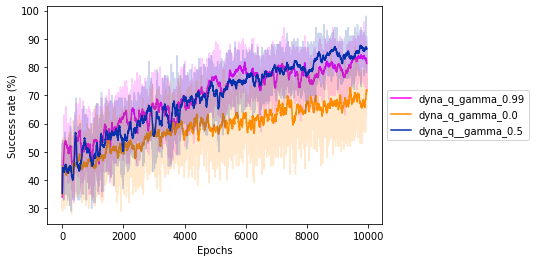

In [60]:
#np.random.shuffle(files)
for i in range(len(files)):
    try:
        if 'gamma'  in files[i]:
            df_results = pd.read_csv(tic_tac_toe_world_path+files[i], sep= ' ', names = ['successes', 'fails', 'nb_steps', 'rewards'])
            label = files[i].split('_results.txt')[0]
            x = np.arange(len(smooth(df_results['successes'], 1)[:10000][15:-30]))/1000
            plt.plot(smooth(df_results['successes'], 1)[:10000][15:-30]*100, alpha = 0.2, color=colors[i])
            plt.plot(smooth(df_results['successes'], 50)[:10000][15:-30]*100, label = label, color=colors[i])
        
    except:
        pass
plt.xlabel("Epochs")
plt.ylabel("Success rate (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

tabular_q_learning_results.txt
expected_sarsa_results.txt
tabular_sarsa_results.txt
dyna_q_control_results.txt


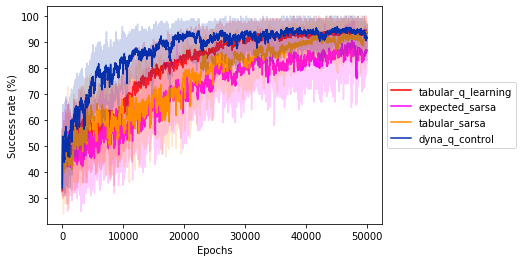

In [17]:

#np.random.shuffle(files)
for i in range(len(files)):
    try:
        if 'monte' not in files[i]:
            print(files[i])
            df_results = pd.read_csv(tic_tac_toe_world_path+files[i], sep= ' ', names = ['successes', 'fails', 'nb_steps', 'rewards'])
            label = files[i].split('_results.txt')[0]
            x = np.arange(len(smooth(df_results['successes'], 1)[:50000][15:-30]))/1000
            plt.plot(smooth(df_results['successes'], 1)[:50000][15:-30]*100, alpha = 0.2, color=colors[i])
            plt.plot(smooth(df_results['successes'], 50)[:50000][15:-30]*100, label = label, color=colors[i])
    except:
        pass
plt.xlabel("Epochs")
plt.ylabel("Success rate (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Line World

In [242]:
line_world_path = path + '/line_world/Data/'

In [243]:
os.chdir(line_world_path)
files = glob.glob('*')
files = os.listdir()
print(line_world_path)
print(files)

/home/wissam/RL_algorithms/line_world/Data/
['off_policy_monte_carlo_control_results.txt', 'dyna_q_control_results.txt', 'policy_iteration_results.txt', 'reinforce_results.txt', 'tabular_sarsa_results.txt', 'value_iteration_results.txt', 'on_policy_first_visit_monte_carlo_control_results.txt', 'monte_carlo_with_exploring_starts_control_results.txt', 'tabular_q_learning_results.txt', 'expected_sarsa_results.txt']


['off_policy_monte_carlo_control_results.txt', 'dyna_q_control_results.txt', 'policy_iteration_results.txt', 'reinforce_results.txt', 'tabular_sarsa_results.txt', 'value_iteration_results.txt', 'on_policy_first_visit_monte_carlo_control_results.txt', 'monte_carlo_with_exploring_starts_control_results.txt', 'tabular_q_learning_results.txt', 'expected_sarsa_results.txt']


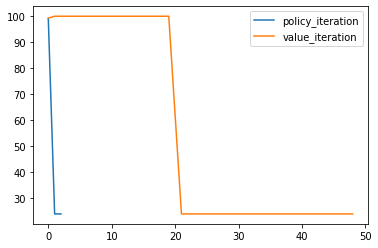

In [244]:
print(files)
for i in range(len(files)):
    try:
        if 'iteration' in files[i]:
            df_results = pd.read_csv(line_world_path+files[i], sep= ' ', names = ['episodes','successes', 'fails', 'nb_steps', 'rewards'])
            label = files[i].split('_results.txt')[0]
            plt.plot(smooth(df_results.groupby('episodes').mean()['nb_steps'], 1)[0:100], label = label)
    except:
        pass
    
plt.legend()
plt.show()

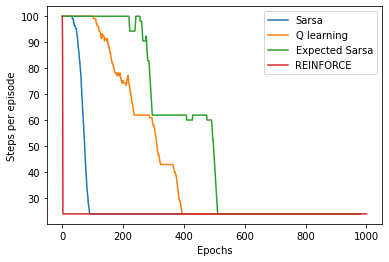

In [245]:
labels = ["Dyna Q", "Sarsa", "Q learning", "Expected Sarsa"]
k = 0

for i in range(len(files)):
    try:
        if not 'iteration' in files[i] and not 'monte' in files[i] and not 'reinforce' in files[i]:
            k+=1
            df_results = pd.read_csv(line_world_path+files[i], sep= ' ', names = ['episodes','successes', 'fails', 'nb_steps', 'rewards'])
            label = files[i].split('_results.txt')[0]
            plt.plot(smooth(df_results.groupby('episodes').mean()['nb_steps'], 20)[10:-10], label = labels[k])
    except:
        k-=1
        pass
df_results = pd.read_csv(line_world_path+'reinforce_results.txt', sep= ' ', names = ['nb_steps'])
#label = files[i].split('_results.txt')[0]
plt.plot(smooth(df_results['nb_steps'], 1)[:], label = 'REINFORCE')

plt.xlabel('Epochs')
plt.ylabel('Steps per episode')

plt.legend()
plt.show()

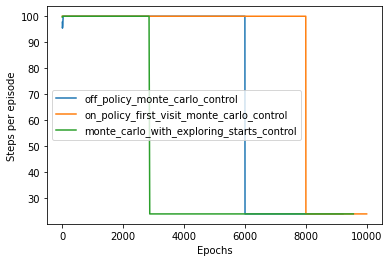

In [247]:
for i in range(len(files)):
    try:
        if 'monte' in files[i]:
            df_results = pd.read_csv(line_world_path+files[i], sep= ' ', names = ['episodes','successes', 'fails', 'nb_steps', 'rewards'])
            label = files[i].split('_results.txt')[0]
            y = smooth(df_results.groupby('episodes').mean()['nb_steps'], 20)[10:-10]                
            plt.plot(y, label = label)
    except:
        pass
plt.xlabel('Epochs')
plt.ylabel('Steps per episode')
plt.legend()
plt.show()

## Grid World

In [4]:
line_world_path = path + '/grid_world/Data/'

In [5]:
os.chdir(line_world_path)
files = glob.glob('*')
files = os.listdir()
print(line_world_path)
print(files)

/home/jugurtha/esgi/RL/DRL/grid_world/Data/
['reinforce_results.txt', 'policy_iteration_results.txt', 'off_policy_monte_carlo_control_results.txt', 'tabular_q_learning_results.txt', 'monte_carlo_with_exploring_starts_control_results.txt', 'value_iteration_results.txt', 'on_policy_first_visit_monte_carlo_control_results.txt', 'expected_sarsa_results.txt', 'tabular_sarsa_results.txt', 'dyna_q_control_results.txt']


['reinforce_results.txt', 'policy_iteration_results.txt', 'off_policy_monte_carlo_control_results.txt', 'tabular_q_learning_results.txt', 'monte_carlo_with_exploring_starts_control_results.txt', 'value_iteration_results.txt', 'on_policy_first_visit_monte_carlo_control_results.txt', 'expected_sarsa_results.txt', 'tabular_sarsa_results.txt', 'dyna_q_control_results.txt']


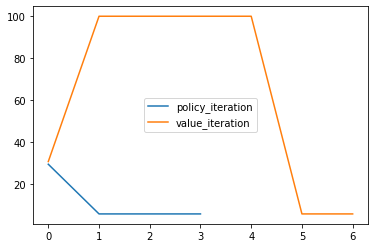

In [6]:
print(files)
for i in range(len(files)):
    try:
        if 'iteration' in files[i]:
            df_results = pd.read_csv(line_world_path+files[i], sep= ' ', names = ['episodes','successes', 'fails', 'nb_steps', 'rewards'])
            label = files[i].split('_results.txt')[0]
            plt.plot(smooth(df_results.groupby('episodes').mean()['nb_steps'], 1)[0:100], label = label)
    except:
        pass
    
plt.legend()
plt.show()

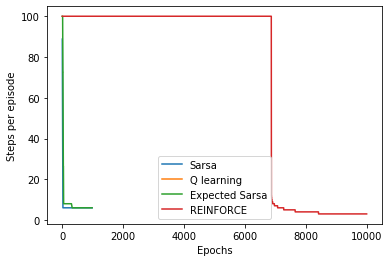

In [7]:
labels = ["Dyna Q", "Sarsa", "Q learning", "Expected Sarsa"]
k = 0

for i in range(len(files)):
    try:
        if not 'iteration' in files[i] and not 'monte' in files[i] and not 'reinforce' in files[i]:
            k+=1
            df_results = pd.read_csv(line_world_path+files[i], sep= ' ', names = ['episodes','successes', 'fails', 'nb_steps', 'rewards'])
            label = files[i].split('_results.txt')[0]
            plt.plot(smooth(df_results.groupby('episodes').mean()['nb_steps'], 20)[10:-10], label = labels[k])
    except:
        k-=1
        pass
df_results = pd.read_csv(line_world_path+'reinforce_results.txt', sep= '\n', names = ['nb_steps'])
#label = files[i].split('_results.txt')[0]
plt.plot(smooth(sorted(df_results['nb_steps'],reverse=True), 1)[:] ,label = 'REINFORCE')

plt.xlabel('Epochs')
plt.ylabel('Steps per episode')

plt.legend()
plt.show()

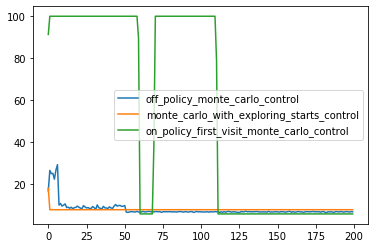

In [8]:
for i in range(len(files)):
    try:
        if 'monte' in files[i]:
            df_results = pd.read_csv(line_world_path+files[i], sep= ' ', names = ['episodes','successes', 'fails', 'nb_steps', 'rewards'])
            label = files[i].split('_results.txt')[0]
            plt.plot(smooth(df_results.groupby('episodes').mean()['nb_steps'], 1)[0:200], label = label)
    except:
        pass
plt.legend()
plt.show()